# Fourier-Series Assignment
__Author__ : sara sadat nasr - 99222109

__Course__ : Undergraduate Numerical Analysis Course

In [26]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

## Problem 1
Plot periodic function $f(x) = x^3$

in −2 < x < 2 for n = 2, 5, 10 with Fourier series. Consider constants L = 2(2L = 4).

Hint: You should approximate given function f(x) with 5, 11 and 21 nomials.


In [64]:
#t is the independent variable
P = 2. #period value
BT= -2. #initian value of t (begin time)
ET=2. #final value of t (end time)
FS=1000 #number of discrete values of t between BT and ET

#the periodic real-valued function f(t) with period equal to P
f = lambda t: ((t % P) - (P / 2.)) ** 3

#all discrete values of t in the interval from BT and ET
t_range = np.linspace(BT, ET, FS)
y_true = f(t_range) #the true f(t)

In [65]:
#function that computes the real fourier couples of coefficients (a0, 0), (a1, b1)...(aN, bN)
def compute_real_fourier_coeffs(func, N):
    result = []
    for n in range(N+1):
        an = (2./P) * spi.quad(lambda t: func(t) * np.cos(2 * np.pi * n * t / P), 0, P)[0]
        bn = (2./P) * spi.quad(lambda t: func(t) * np.sin(2 * np.pi * n * t / P), 0, P)[0]
        result.append((an, bn))
    return np.array(result)

In [66]:
#function that computes the real form Fourier series using an and bn coefficients
def fit_func_by_fourier_series_with_real_coeffs(t, AB):
    result = 0.
    A = AB[:,0]
    B = AB[:,1]
    for n in range(0, len(AB)):
        if n > 0:
            result +=  A[n] * np.cos(2. * np.pi * n * t / P) + B[n] * np.sin(2. * np.pi * n * t / P)
        else:
            result +=  A[0]/2.
    return result

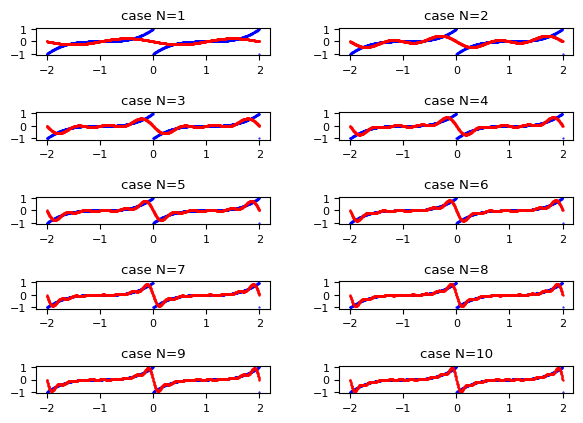

In [71]:
maxN=10
COLs = 2 #cols of plt
ROWs = 1 + (maxN-1) // COLs #rows of plt
plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(ROWs, COLs)
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)

#plot, in the range from BT to ET, the true f(t) in blue and the approximation in red
for N in range(1, maxN + 1):
    AB = compute_real_fourier_coeffs(f, N)
    #AB contains the list of couples of (an, bn) coefficients for n in 1..N interval.

    y_approx = fit_func_by_fourier_series_with_real_coeffs(t_range, AB)
    #y_approx contains the discrete values of approximation obtained by the Fourier series

    row = (N-1) // COLs
    col = (N-1) % COLs
    axs[row, col].set_title('case N=' + str(N))
    axs[row, col].scatter(t_range, y_true, color='blue', s=1, marker='.')
    axs[row, col].scatter(t_range, y_approx, color='red', s=2, marker='.')
plt.show()

## Conclusion for this problem
In this session we learned about Fourier-Series and how it estimates the value in a period.

 The baseline of this method is triangular wave which sets the convex,... for better visualization i repeated the f(x) and draw it for N = 1-10.